In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from skimage import measure

In [2]:
root=r'result'
file = os.listdir(root)

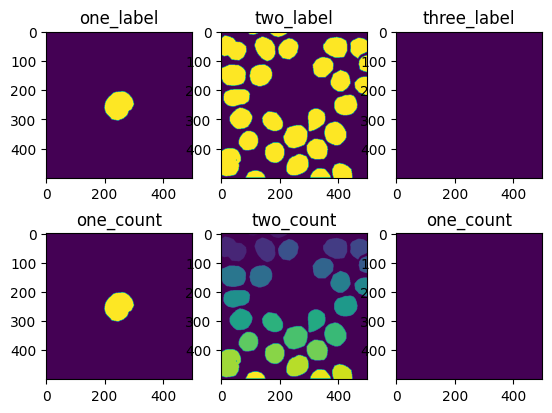

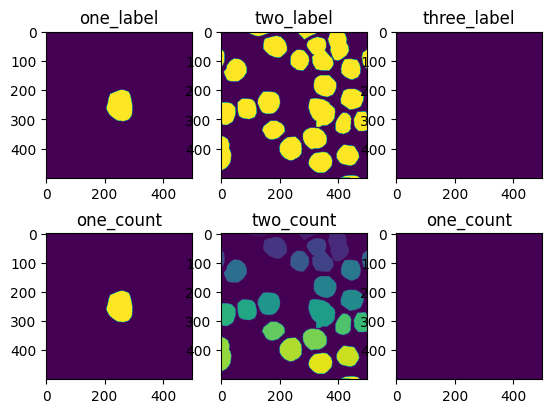

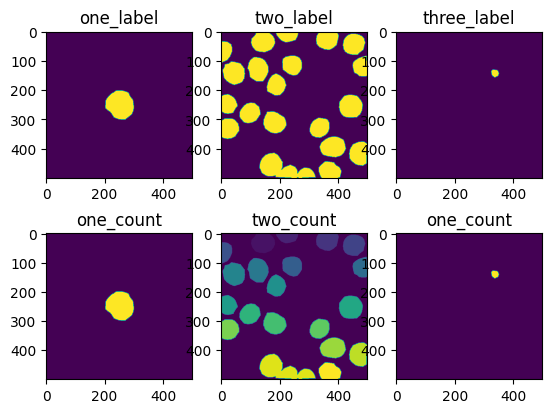

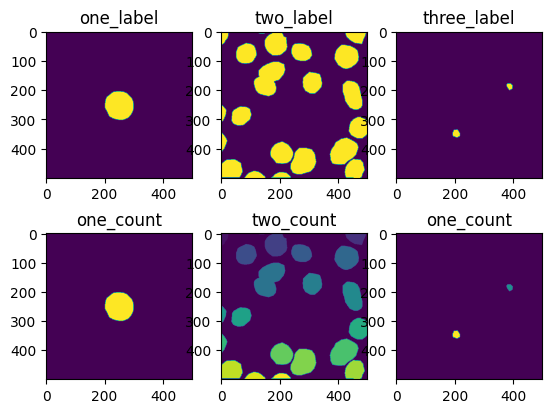

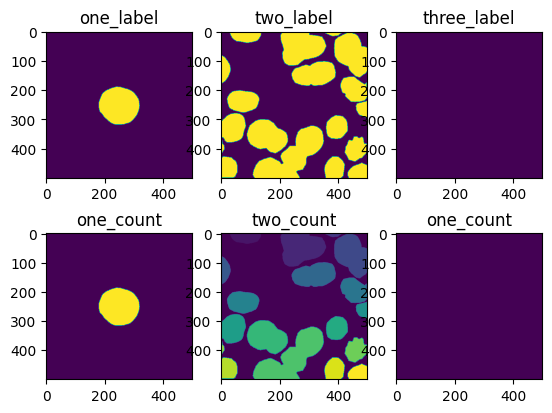

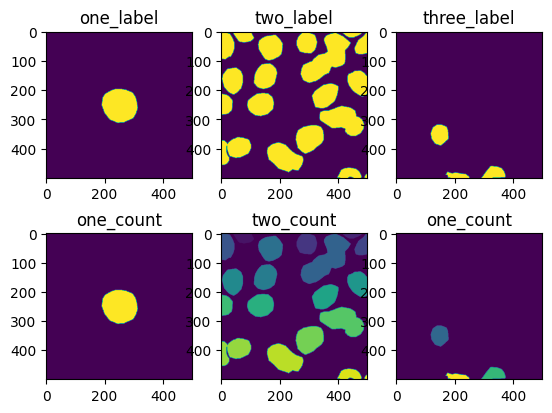

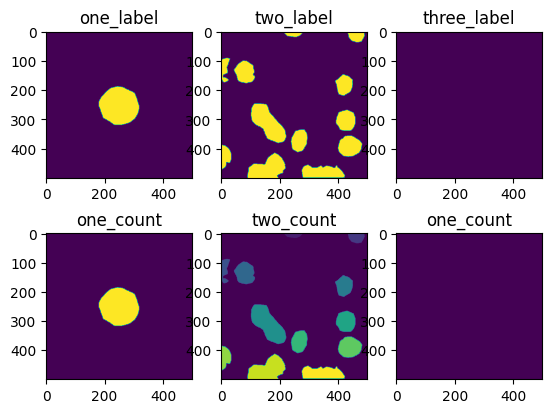

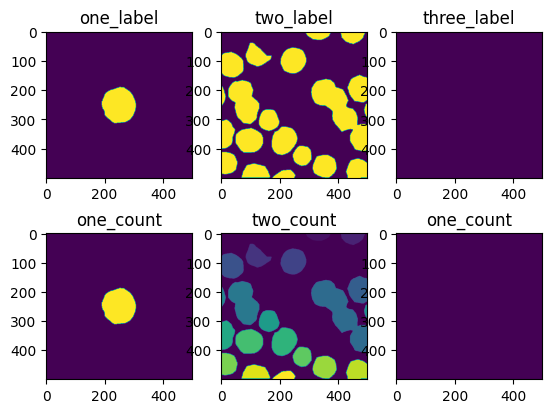

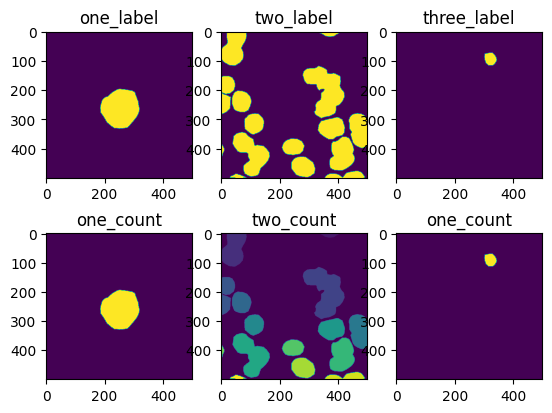

In [3]:
count = np.zeros((len(file), 3),dtype=int)
area = np.zeros((len(file), 3))
for i, line in enumerate(file):
    img = np.load(os.path.join(root, line))


    area[i, 0] = (img == np.ones_like(img)).sum()
    label_one = np.where(img == 1, 1, 0)
    count_one = measure.label(label_one, connectivity=2)
    count[i, 0] = np.max(count_one)

    plt.subplot(2, 3, 1)
    plt.title('one_label')
    plt.imshow(label_one)
    plt.subplot(2, 3, 4)
    plt.title('one_count')
    plt.imshow(count_one)

    area[i, 1] = (img == np.ones_like(img)*2).sum()
    label_two = np.where(img == 2, 1, 0)
    count_two = measure.label(label_two, connectivity=2)
    count[i, 1] = np.max(count_two)
    plt.subplot(2, 3, 2)
    plt.title('two_label')
    plt.imshow(label_two)
    plt.subplot(2, 3, 5)
    plt.title('two_count')
    plt.imshow(count_two)

    area[i, 2] = (img == np.ones_like(img)*3).sum()
    label_three = np.where(img == 3, 1, 0)
    count_three = measure.label(label_three, connectivity=2)
    count[i, 2] = np.max(count_three)
    plt.subplot(2, 3, 3)
    plt.title('three_label')
    plt.imshow(label_three)
    plt.subplot(2, 3, 6)
    plt.title('one_count')
    plt.imshow(count_three)
    
    plt.show()


In [4]:
from prettytable import PrettyTable
number_count = PrettyTable(["编号/各类别数量", "class1", "class2", "class3"])
 
for i,line in enumerate(file):
    number_count.add_row([line[:-4],count[i,0],count[i,1],count[i,2]])

print(number_count)                 # 绘制表格

+-----------------+--------+--------+--------+
| 编号/各类别数量 | class1 | class2 | class3 |
+-----------------+--------+--------+--------+
|  20220623163957 |   1    |   28   |   0    |
|  20220623164000 |   1    |   25   |   0    |
|  20220623164003 |   1    |   20   |   1    |
|  20220623164006 |   1    |   21   |   2    |
|  20220623164009 |   1    |   18   |   0    |
|  20220623164013 |   1    |   19   |   3    |
|  20220623164017 |   1    |   12   |   0    |
|  20220623164021 |   1    |   20   |   0    |
|  20220623164024 |   1    |   15   |   1    |
+-----------------+--------+--------+--------+


In [5]:
area_count = PrettyTable(["编号/各类别半径", "class1", "class2", "class3"])

#原图大小大概为1080*1074，进行语义分割后大小为500*500，面积大概差4倍
for i,line in enumerate(file):
    area_count.add_row([line[:-4],np.sqrt(area[i,0]*4/count[i,0]/np.pi),np.sqrt(area[i,1]*4/count[i,1]/np.pi),np.sqrt(area[i,2]*4/count[i,2]/np.pi)])
print(area_count)
#若为nan即代表该类细胞数量为0

+-----------------+--------------------+-------------------+--------------------+
| 编号/各类别半径 |       class1       |       class2      |       class3       |
+-----------------+--------------------+-------------------+--------------------+
|  20220623163957 | 96.60006533830092  | 67.39274348617198 |        nan         |
|  20220623164000 | 98.16898753730959  | 67.78319328232861 |        nan         |
|  20220623164003 | 97.28303827500693  | 72.11923141744607 | 26.123866405607867 |
|  20220623164006 | 99.00201015823508  | 66.60987937742401 | 23.695962509005764 |
|  20220623164009 | 133.8782770700194  | 90.46562947277994 |        nan         |
|  20220623164013 | 119.5868996440051  | 79.65312086806728 | 54.252238794782635 |
|  20220623164017 | 133.10570335259789 |  70.2470786738631 |        nan         |
|  20220623164021 | 119.11751125056573 | 79.14958540626213 |        nan         |
|  20220623164024 | 132.33343001028663 | 79.26438654789311 | 42.77435242974964  |
+-----------------+----

C:\Users\plank\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
